<a href="https://colab.research.google.com/github/kamangirkhan/Data110/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ** Introduction**
The global population has been growing at varying rates across different regions of the world. My research question is:  
**"How has population growth and density changed over time across different regions of the world?"**  

For this analysis, I used the **population dataset**, which contains population estimates for different world regions from **1950 to 2023**.  
To answer this question, I focused on the following **key columns** from the dataset:
- **`year`** – The year of the population estimate.
- **`area`** – The geographical region (e.g., Asia, Africa, Europe).
- **`population`** – The total population of each region.
- **`natural_population_growth_rate`** – The annual growth rate in percentage.
- **`population_density`** – The number of people per square kilometer.

# ** Data Analysis**
I performed the following **data analysis steps**:

1. **Data Cleaning & Filtering:**  
   - Ensure that only relevant regions are included.
   - Remove unnecessary columns.
   - Filter the dataset to focus on every **10 years from 1973 to 2023**.
   
2. **Exploratory Data Analysis (EDA):**  
   - Calculate key summary statistics for **population and density**.
   - Identify trends and regional variations.

3. **Data Visualization:**  
   - **Bar Charts** to compare population sizes.
   - **Line Plots** for **growth rates** and **population density trends**.
   - **Pie Charts** to show the **distribution of the global population** in specific years.

In [4]:
import pandas as pd

# Load the CSV file
pop = pd.read_csv("/population.csv")

# Clean the 'area' column by removing "(UN)" and modifying region names
pop['area'] = pop['area'].str.replace(r" \(UN\)", "", regex=True)
pop['area'] = pop['area'].replace("Latin America and the Caribbean", "Latin America")

# Define the list of regions to filter
regions = ["Asia", "Africa", "Europe", "Latin America", "Northern America", "Oceania"]

# Filter the dataframe to keep only the selected regions
con_pop = pop[pop['area'].isin(regions)]

# Display the first few rows of the filtered dataset
print(con_pop.head())


      area  year  population  sex_ratio  birth_rate  death_rate  \
74  Africa  1950   227776419  99.442200      47.760      26.896   
75  Africa  1951   232556971  99.342720      47.896      26.404   
76  Africa  1952   237539544  99.262350      47.986      25.980   
77  Africa  1953   242685066  99.195045      48.084      25.574   
78  Africa  1954   248005818  99.129060      48.080      25.253   

    population_density   natural_population_growth_rate  
74                7.708                          2.0864  
75                7.870                          2.1492  
76                8.038                          2.2006  
77                8.212                          2.2510  
78                8.392                          2.2827  


##**Population Distribution in 1973 (Pie Chart)**

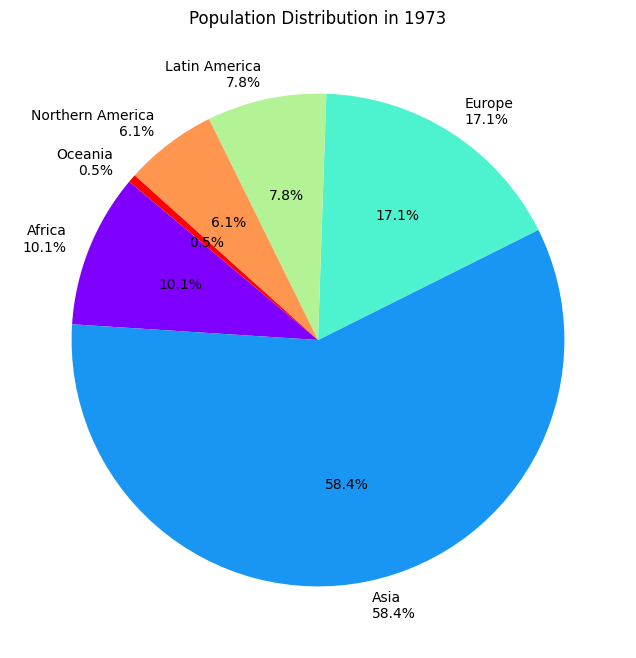

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter data for the year 1973
con_pop_1973 = con_pop[con_pop['year'] == 1973].copy()

# Calculate percentage for each region
con_pop_1973['percentage'] = (con_pop_1973['population'] / con_pop_1973['population'].sum()) * 100

# Create labels with region names and percentages
labels = [f"{area}\n{round(perc, 1)}%" for area, perc in zip(con_pop_1973['area'], con_pop_1973['percentage'])]

# Generate distinct colors using the rainbow colormap
num_regions = len(con_pop_1973)
colors = plt.cm.rainbow(np.linspace(0, 1, num_regions))  # Properly spaced colors

# Set up the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size
plt.pie(con_pop_1973['population'], labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add title
plt.title("Population Distribution in 1973")

# Show plot
plt.show()



##**Population Growth Rate Over Time (1973-2023, every 10 years, Line Chart))**

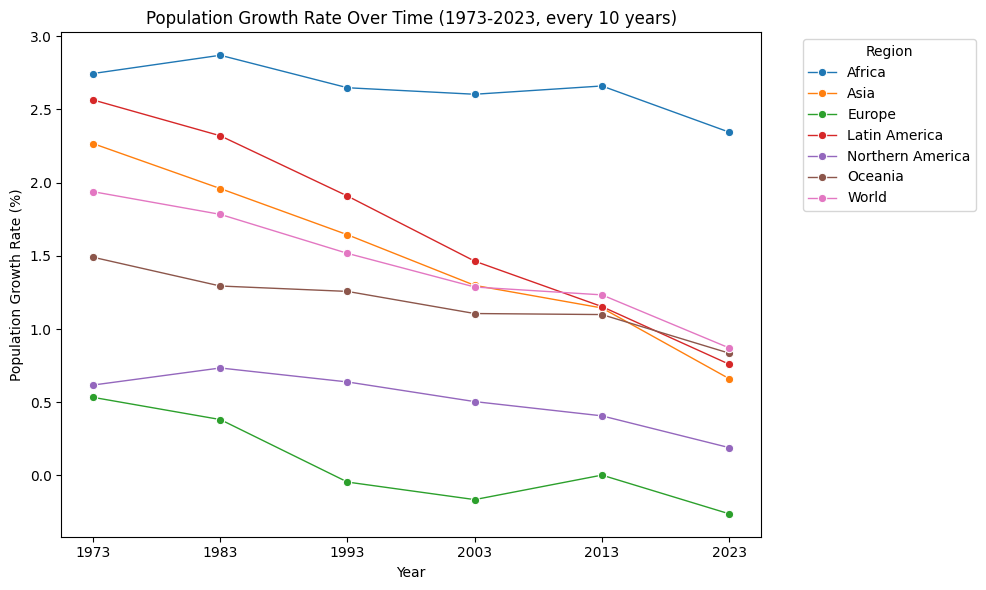

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define world regions
world = ["Asia", "Africa", "Europe", "Latin America", "Northern America", "Oceania", "World"]

# Filter the dataset for world regions
world_pop = pop[pop['area'].isin(world)]

# Filter for every 10 years from 1973 to 2023
world_pop_time_growth = world_pop[(world_pop['year'] % 10 == 3) & (world_pop['year'].between(1973, 2023))]

# Set figure size
plt.figure(figsize=(10, 6))

# Create line plot
sns.lineplot(data=world_pop_time_growth, x="year", y="natural_population_growth_rate", hue="area", marker="o", linewidth=1)

# Customize plot
plt.title("Population Growth Rate Over Time (1973-2023, every 10 years)")
plt.xlabel("Year")
plt.ylabel("Population Growth Rate (%)")
plt.xticks(range(1973, 2024, 10))  # Set x-axis ticks every 10 years
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside

# Show plot
plt.tight_layout()
plt.show()


##**Population Density Over Time (1973-2023, every 10 years, Line Chart)**

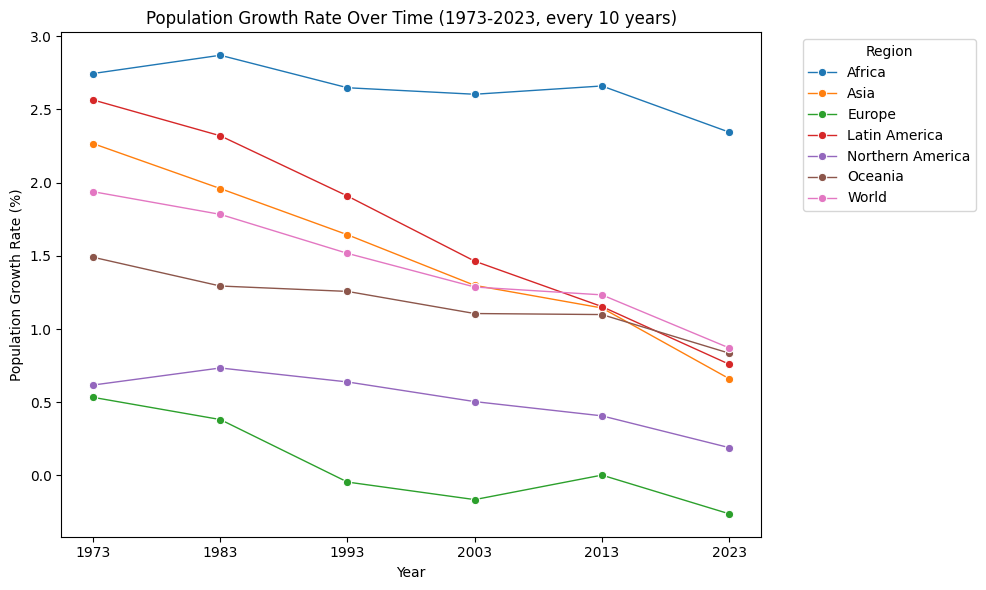

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

world_pop = pop[pop['area'].isin(world)]

# Filter for every 10 years from 1973 to 2023
world_pop_time_growth = world_pop[(world_pop['year'] % 10 == 3) & (world_pop['year'].between(1973, 2023))]

# Set figure size
plt.figure(figsize=(10, 6))

# Create line plot
sns.lineplot(data=world_pop_time_growth, x="year", y="natural_population_growth_rate", hue="area", marker="o", linewidth=1)

# Customize plot
plt.title("Population Growth Rate Over Time (1973-2023, every 10 years)")
plt.xlabel("Year")
plt.ylabel("Population Growth Rate (%)")
plt.xticks(range(1973, 2024, 10))  # Set x-axis ticks every 10 years
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside

# Show plot
plt.tight_layout()
plt.show()


##**Population Distribution in 2023 (Pie Chart)**

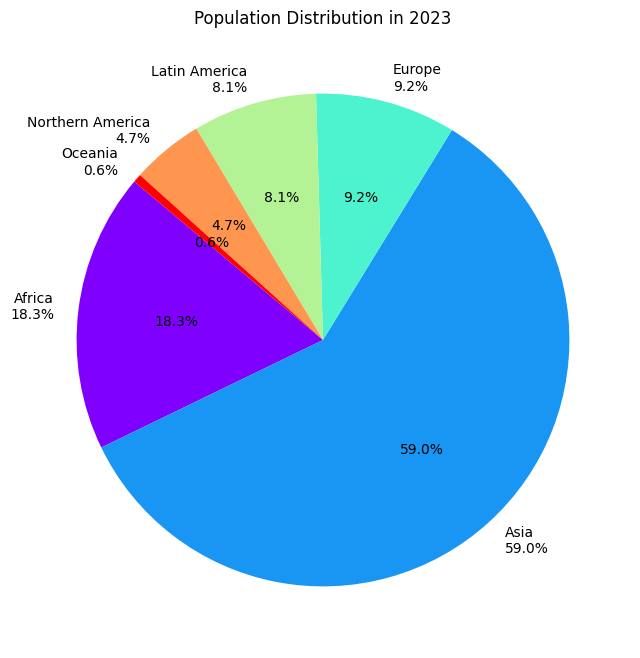

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter data for the year 2023
con_pop_2023 = con_pop[con_pop['year'] == 2023].copy()

# Calculate percentage for each region
con_pop_2023['percentage'] = (con_pop_2023['population'] / con_pop_2023['population'].sum()) * 100

# Create labels with region names and percentages
labels = [f"{area}\n{round(perc, 1)}%" for area, perc in zip(con_pop_2023['area'], con_pop_2023['percentage'])]

# Generate distinct colors for each segment
num_regions = len(con_pop_2023)
colors = plt.cm.rainbow(np.linspace(0, 1, num_regions))

# Set up the pie chart
plt.figure(figsize=(8, 8))  # Adjust figure size
plt.pie(con_pop_2023['population'], labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Add title
plt.title("Population Distribution in 2023")

# Show plot
plt.show()


##**Population Comparison by Region (1973 vs. 2023, Side-by-Side Bar Chart)**

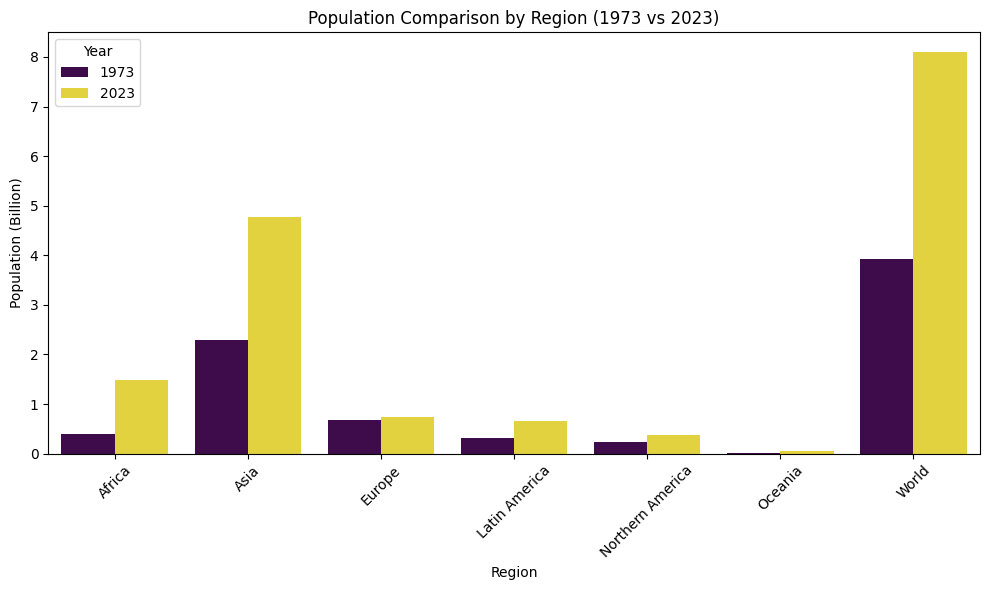

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for the years 1973 and 2023
world_pop_bar = world_pop[world_pop['year'].isin([1973, 2023])].copy()

# Convert population to billions
world_pop_bar['population_billion'] = world_pop_bar['population'] / 1e9

# Set figure size
plt.figure(figsize=(10, 6))

# Create bar plot with dodge positioning
sns.barplot(data=world_pop_bar, x="area", y="population_billion", hue="year", palette="viridis")

# Customize plot
plt.title("Population Comparison by Region (1973 vs 2023)")
plt.xlabel("Region")
plt.ylabel("Population (Billion)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title="Year")

# Show plot
plt.tight_layout()
plt.show()
